# Aggiungiamo le colonne
---
1. ultime due cifre dell'anno
2. punteggio primi 3
3. punteggio ultimi 3
4. area geografica
5. colore medaglia

In [1]:
import numpy as np
import pandas as pd

In [2]:
CeseTot = pd.read_pickle("data/datiBasePuliti/validi/Cese_2003-2024.pickle")
CeseTot

,anno,studente,posizione,regione,classe,es1,es2,es3,es4,es5,es6,tot,medaglia
0,2003,Tiozzo Giulio,1,(Piemonte),5,7,7,7,6,7,7,41,ORO
1,2003,Mantova Vincenzo,2,(Lombardia),5,7,7,7,7,7,5,40,ORO
2,2003,Barbieri Luca,3,(Lombardia),3,7,7,7,4,4,7,36,ORO
3,2003,D'Aurizio Jacopo,3,(Abruzzo),5,7,2,7,6,7,7,36,ORO
4,2003,Ghiraldin Francesco,3,(Veneto),5,7,7,7,7,7,1,36,ORO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6579,2024,Saggiorato Leonardo,292,(),-1,0,3,0,0,0,0,3,-
6580,2024,Miccichè Calogero,293,(),-1,0,2,0,0,0,0,2,-
6581,2024,Celebre Francesco,293,(),-1,0,0,2,0,0,0,2,-
6582,2024,La Malfa Salvatore,295,(),-1,0,0,0,0,0,0,0,-


In [5]:
def fun_anno(a):
    return str(a)[-2:]

In [7]:
fun_anno(2003)

'03'

In [8]:
CeseTot["anno_breve"] = CeseTot["anno"].map(fun_anno)
CeseTot

,anno,studente,posizione,regione,classe,es1,es2,es3,es4,es5,es6,tot,medaglia,anno_breve
0,2003,Tiozzo Giulio,1,(Piemonte),5,7,7,7,6,7,7,41,ORO,03
1,2003,Mantova Vincenzo,2,(Lombardia),5,7,7,7,7,7,5,40,ORO,03
2,2003,Barbieri Luca,3,(Lombardia),3,7,7,7,4,4,7,36,ORO,03
3,2003,D'Aurizio Jacopo,3,(Abruzzo),5,7,2,7,6,7,7,36,ORO,03
4,2003,Ghiraldin Francesco,3,(Veneto),5,7,7,7,7,7,1,36,ORO,03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6579,2024,Saggiorato Leonardo,292,(),-1,0,3,0,0,0,0,3,-,24
6580,2024,Miccichè Calogero,293,(),-1,0,2,0,0,0,0,2,-,24
6581,2024,Celebre Francesco,293,(),-1,0,0,2,0,0,0,2,-,24
6582,2024,La Malfa Salvatore,295,(),-1,0,0,0,0,0,0,0,-,24


In [9]:
CeseTot["pt123"] = CeseTot["es1"] + CeseTot["es2"] + CeseTot["es3"]
CeseTot["pt456"] = CeseTot["es4"] + CeseTot["es5"] + CeseTot["es6"]
CeseTot

,anno,studente,posizione,regione,classe,es1,es2,es3,es4,es5,es6,tot,medaglia,anno_breve,pt123,pt456
0,2003,Tiozzo Giulio,1,(Piemonte),5,7,7,7,6,7,7,41,ORO,03,21,20
1,2003,Mantova Vincenzo,2,(Lombardia),5,7,7,7,7,7,5,40,ORO,03,21,19
2,2003,Barbieri Luca,3,(Lombardia),3,7,7,7,4,4,7,36,ORO,03,21,15
3,2003,D'Aurizio Jacopo,3,(Abruzzo),5,7,2,7,6,7,7,36,ORO,03,16,20
4,2003,Ghiraldin Francesco,3,(Veneto),5,7,7,7,7,7,1,36,ORO,03,21,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6579,2024,Saggiorato Leonardo,292,(),-1,0,3,0,0,0,0,3,-,24,3,0
6580,2024,Miccichè Calogero,293,(),-1,0,2,0,0,0,0,2,-,24,2,0
6581,2024,Celebre Francesco,293,(),-1,0,0,2,0,0,0,2,-,24,2,0
6582,2024,La Malfa Salvatore,295,(),-1,0,0,0,0,0,0,0,-,24,0,0


## Ora sistemo i nomi delle regioni, che sono scritti male

In [10]:
def aggiusta_reg(x):
    if x == "()":
        return "-"
    elif (x == "(Valle D'Aosta)") | (x == "(Valle D'aosta)"):
        return "Valle d'Aosta"
    elif x == "(Emilia Romagna)":
        return "Emilia-Romagna"
    elif x == "(Friuli Venezia Giulia)":
        return "Friuli-Venezia Giulia"
    elif x == "(Trentino Alto Adige)":
        return "Trentino-Alto Adige"
    else:
        return x[1:-1]

In [13]:
aggiusta_reg("(Sardegna)")

'Sardegna'

In [14]:
CeseTot["regione"] = CeseTot["regione"].map(aggiusta_reg)
CeseTot

,anno,studente,posizione,regione,classe,es1,es2,es3,es4,es5,es6,tot,medaglia,anno_breve,pt123,pt456
0,2003,Tiozzo Giulio,1,Piemonte,5,7,7,7,6,7,7,41,ORO,03,21,20
1,2003,Mantova Vincenzo,2,Lombardia,5,7,7,7,7,7,5,40,ORO,03,21,19
2,2003,Barbieri Luca,3,Lombardia,3,7,7,7,4,4,7,36,ORO,03,21,15
3,2003,D'Aurizio Jacopo,3,Abruzzo,5,7,2,7,6,7,7,36,ORO,03,16,20
4,2003,Ghiraldin Francesco,3,Veneto,5,7,7,7,7,7,1,36,ORO,03,21,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6579,2024,Saggiorato Leonardo,292,-,-1,0,3,0,0,0,0,3,-,24,3,0
6580,2024,Miccichè Calogero,293,-,-1,0,2,0,0,0,0,2,-,24,2,0
6581,2024,Celebre Francesco,293,-,-1,0,0,2,0,0,0,2,-,24,2,0
6582,2024,La Malfa Salvatore,295,-,-1,0,0,0,0,0,0,0,-,24,0,0


In [16]:
def assegna_zona(x):
    NO = ["Valle d'Aosta", "Liguria", "Lombardia", "Piemonte"]
    NE = ["Trentino-Alto Adige", "Veneto", "Friuli-Venezia Giulia", "Emilia-Romagna"]
    Centro = ["Toscana", "Umbria", "Marche", "Lazio"]
    Sud = ["Abruzzo", "Molise", "Campania", "Puglia", "Basilicata", "Calabria"]
    Isole = ["Sicilia", "Sardegna"]
    if x in NO:
        return "Nord-Ovest"
    elif x in NE:
        return "Nord-Est"
    elif x in Centro:
        return "Centro"
    elif x in Sud:
        return "Sud"
    elif x in Isole:
        return "Isole"
    else:
        return "-"

In [20]:
assegna_zona("Sardegna")

'Isole'

In [21]:
CeseTot["zona"] = CeseTot["regione"].map(assegna_zona)
CeseTot

,anno,studente,posizione,regione,classe,es1,es2,es3,es4,es5,es6,tot,medaglia,anno_breve,pt123,pt456,zona
0,2003,Tiozzo Giulio,1,Piemonte,5,7,7,7,6,7,7,41,ORO,03,21,20,Nord-Ovest
1,2003,Mantova Vincenzo,2,Lombardia,5,7,7,7,7,7,5,40,ORO,03,21,19,Nord-Ovest
2,2003,Barbieri Luca,3,Lombardia,3,7,7,7,4,4,7,36,ORO,03,21,15,Nord-Ovest
3,2003,D'Aurizio Jacopo,3,Abruzzo,5,7,2,7,6,7,7,36,ORO,03,16,20,Sud
4,2003,Ghiraldin Francesco,3,Veneto,5,7,7,7,7,7,1,36,ORO,03,21,15,Nord-Est
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6579,2024,Saggiorato Leonardo,292,-,-1,0,3,0,0,0,0,3,-,24,3,0,-
6580,2024,Miccichè Calogero,293,-,-1,0,2,0,0,0,0,2,-,24,2,0,-
6581,2024,Celebre Francesco,293,-,-1,0,0,2,0,0,0,2,-,24,2,0,-
6582,2024,La Malfa Salvatore,295,-,-1,0,0,0,0,0,0,0,-,24,0,0,-


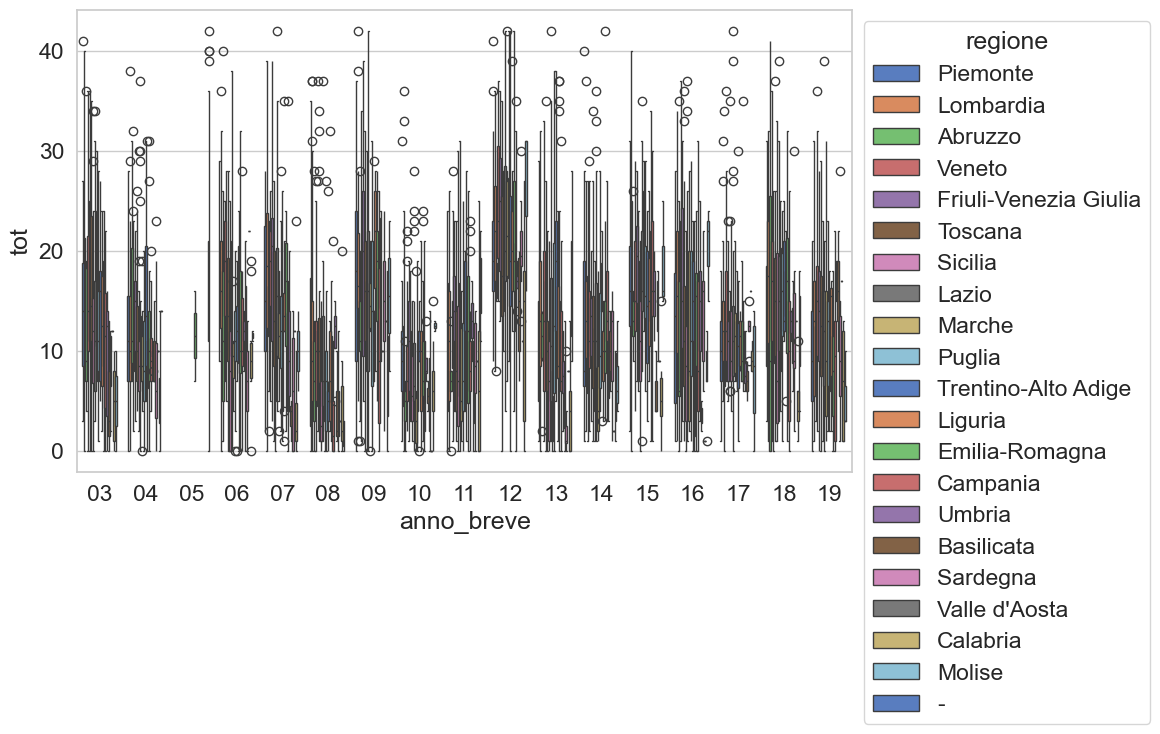

In [24]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set( style="whitegrid", font_scale=1.5)
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(CeseTot[ CeseTot["anno"] <= 2019 ], y = "tot", x= "anno_breve", hue='regione', palette = 'muted')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1));

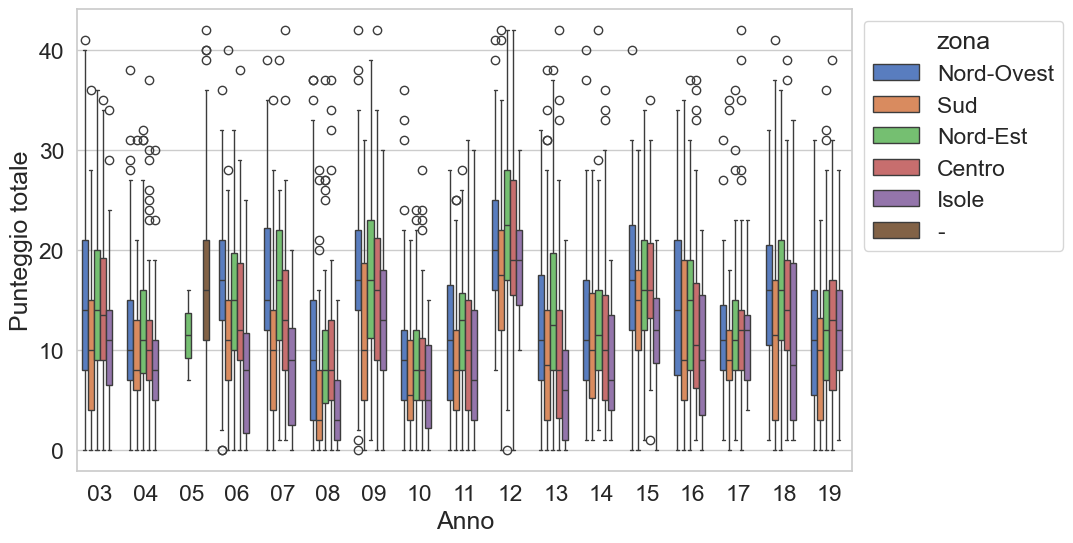

In [28]:
sns.set( style="whitegrid", font_scale=1.5)
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(CeseTot[ CeseTot["anno"] <= 2019 ], y = "tot", x= "anno_breve", hue='zona', palette = 'muted')
ax.set_ylabel("Punteggio totale")
ax.set_xlabel("Anno")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1));

### Ora mi occupo di trovare i colori adatti

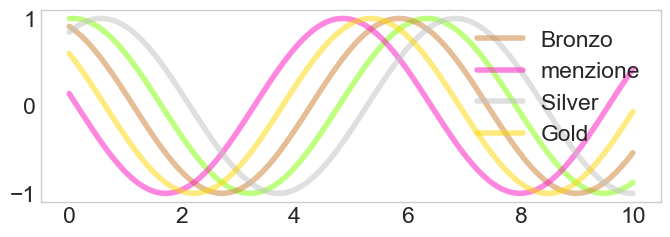

In [102]:
#plt.style.use("dark_background")
plt.style.use("seaborn-v0_8-whitegrid")

fig, ax = plt.subplots(figsize = (8, 2.5) )
x = np.linspace(0, 10, 100)
ax.grid(False)
ax.set_facecolor("1")
#plt.plot(x, np.sin(x), color='red', linestyle="dashdot")              # nome nel colore
#plt.plot(x, np.sin(x + .5), color='b', linestyle="dashed")           # codice corto del colore (rgbcmyk)
#plt.plot(x, np.sin(x + 1), color='0.40', linestyle="dotted")         # scala di grigio (da 0 a 1)
#plt.plot(x, np.sin(x + 1.5), color='#FFDD44')    # Codice RGB esadecimale (da 0 a FF)
#plt.plot(x, np.sin(x + 2), color=(1.0,0.2,0.3))  # Tupla RGB (da 0 a 1)
plt.plot(x, np.sin(x + 1.5), color="#7FFF00", linewidth = 4, alpha=0.5)
plt.plot(x, np.sin(x + 2), color='#CD7F32', linewidth = 4, label = "Bronzo", alpha = 0.5)
plt.plot(x, np.sin(x + 3), color='#FC0FC0', linewidth = 4, label = "menzione", alpha = 0.5)
plt.plot(x, np.sin(x + 1), color='Silver', linewidth = 4, label = "Silver", alpha = 0.5)
plt.plot(x, np.sin(x + 2.5), color='Gold', linewidth = 4, linestyle="-", label="Gold", alpha = 0.5) # Nome del colore (supportato un HTML)
plt.legend();

In [103]:
mapping_colori = {
    "ORO": "Gold",
    "ARGENTO": "Silver",
    "BRONZO": "#CD7F32",
    "MENZIONE": "#FC0FC0",
    "-": "#7FFF00"
}

CeseTot["colore"] = CeseTot["medaglia"].map(mapping_colori)
CeseTot

,anno,studente,posizione,regione,classe,es1,es2,es3,es4,es5,es6,tot,medaglia,anno_breve,pt123,pt456,zona,colore
0,2003,Tiozzo Giulio,1,Piemonte,5,7,7,7,6,7,7,41,ORO,03,21,20,Nord-Ovest,Gold
1,2003,Mantova Vincenzo,2,Lombardia,5,7,7,7,7,7,5,40,ORO,03,21,19,Nord-Ovest,Gold
2,2003,Barbieri Luca,3,Lombardia,3,7,7,7,4,4,7,36,ORO,03,21,15,Nord-Ovest,Gold
3,2003,D'Aurizio Jacopo,3,Abruzzo,5,7,2,7,6,7,7,36,ORO,03,16,20,Sud,Gold
4,2003,Ghiraldin Francesco,3,Veneto,5,7,7,7,7,7,1,36,ORO,03,21,15,Nord-Est,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6579,2024,Saggiorato Leonardo,292,-,-1,0,3,0,0,0,0,3,-,24,3,0,-,#7FFF00
6580,2024,Miccichè Calogero,293,-,-1,0,2,0,0,0,0,2,-,24,2,0,-,#7FFF00
6581,2024,Celebre Francesco,293,-,-1,0,0,2,0,0,0,2,-,24,2,0,-,#7FFF00
6582,2024,La Malfa Salvatore,295,-,-1,0,0,0,0,0,0,0,-,24,0,0,-,#7FFF00


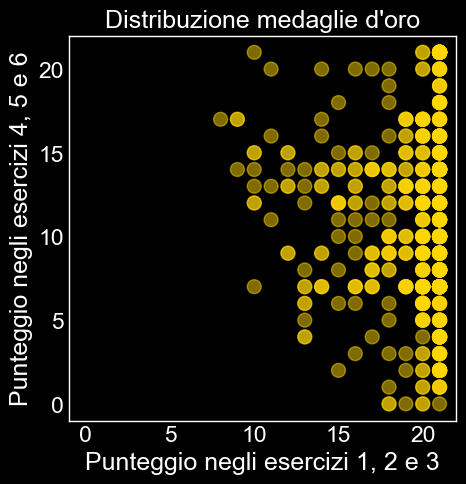

In [126]:
plt.style.use("dark_background")

fig, ax = plt.subplots( figsize = (5, 5) )
plt.scatter(CeseTot[CeseTot["medaglia"]=="ORO"]["pt123"], CeseTot[CeseTot["medaglia"]=="ORO"]["pt456"], alpha=0.5,
           s=100, c=CeseTot[CeseTot["medaglia"]=="ORO"]["colore"])
ax.set_xlim(-1, 22)
ax.set_ylim(-1, 22)
ax.set_xlabel("Punteggio negli esercizi 1, 2 e 3")
ax.set_ylabel("Punteggio negli esercizi 4, 5 e 6")
ax.set_title("Distribuzione medaglie d'oro")
ax.grid(False);

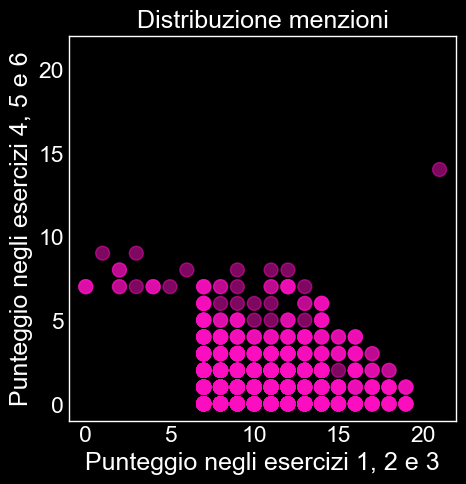

In [132]:
plt.style.use("dark_background")

fig, ax = plt.subplots( figsize = (5, 5) )
plt.scatter(CeseTot[CeseTot["medaglia"]=="MENZIONE"]["pt123"], CeseTot[CeseTot["medaglia"]=="MENZIONE"]["pt456"], alpha=0.5,
           s=100, c=CeseTot[CeseTot["medaglia"]=="MENZIONE"]["colore"])
ax.set_xlim(-1, 22)
ax.set_ylim(-1, 22)
ax.set_xlabel("Punteggio negli esercizi 1, 2 e 3")
ax.set_ylabel("Punteggio negli esercizi 4, 5 e 6")
ax.set_title("Distribuzione menzioni")
ax.grid(False);

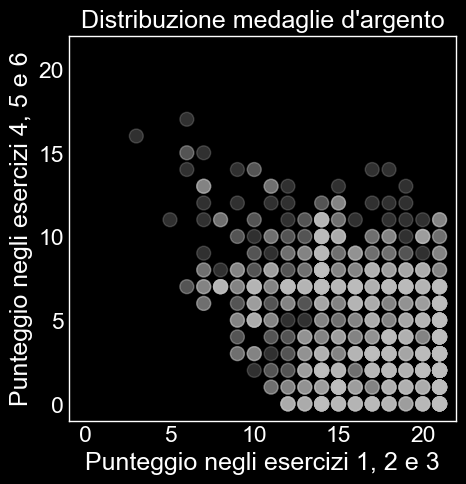

In [137]:
plt.style.use("dark_background")

fig, ax = plt.subplots( figsize = (5, 5) )
plt.scatter(CeseTot[CeseTot["medaglia"]=="ARGENTO"]["pt123"], CeseTot[CeseTot["medaglia"]=="ARGENTO"]["pt456"], alpha=0.25,
           s=100, c=CeseTot[CeseTot["medaglia"]=="ARGENTO"]["colore"])
ax.set_xlim(-1, 22)
ax.set_ylim(-1, 22)
ax.set_xlabel("Punteggio negli esercizi 1, 2 e 3")
ax.set_ylabel("Punteggio negli esercizi 4, 5 e 6")
ax.set_title("Distribuzione medaglie d'argento")
ax.grid(False);

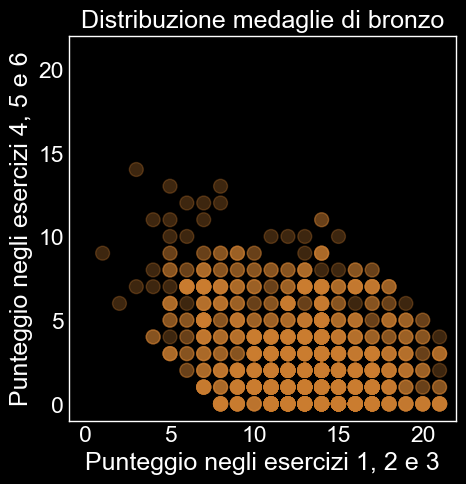

In [134]:
plt.style.use("dark_background")

fig, ax = plt.subplots( figsize = (5, 5) )
plt.scatter(CeseTot[CeseTot["medaglia"]=="BRONZO"]["pt123"], CeseTot[CeseTot["medaglia"]=="BRONZO"]["pt456"], alpha=0.3,
           s=100, c=CeseTot[CeseTot["medaglia"]=="BRONZO"]["colore"])
ax.set_xlim(-1, 22)
ax.set_ylim(-1, 22)
ax.set_xlabel("Punteggio negli esercizi 1, 2 e 3")
ax.set_ylabel("Punteggio negli esercizi 4, 5 e 6")
ax.set_title("Distribuzione medaglie di bronzo")
ax.grid(False);

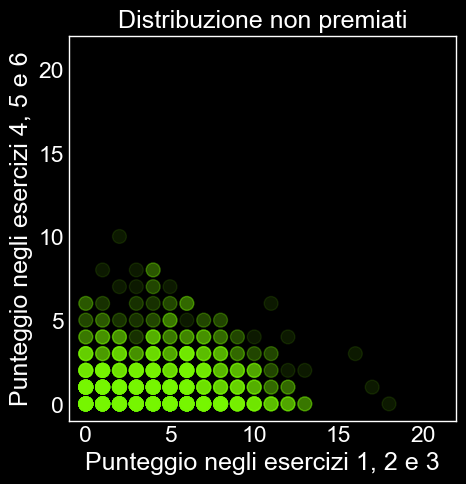

In [140]:
plt.style.use("dark_background")

fig, ax = plt.subplots( figsize = (5, 5) )
plt.scatter(CeseTot[CeseTot["medaglia"]=="-"]["pt123"], CeseTot[CeseTot["medaglia"]=="-"]["pt456"], alpha=0.1,
           s=100, c=CeseTot[CeseTot["medaglia"]=="-"]["colore"])
ax.set_xlim(-1, 22)
ax.set_ylim(-1, 22)
ax.set_xlabel("Punteggio negli esercizi 1, 2 e 3")
ax.set_ylabel("Punteggio negli esercizi 4, 5 e 6")
ax.set_title("Distribuzione non premiati")
ax.grid(False);

In [141]:
CeseTot[(CeseTot["tot"]>20) & (CeseTot["medaglia"]=="MENZIONE")]

,anno,studente,posizione,regione,classe,es1,es2,es3,es4,es5,es6,tot,medaglia,anno_breve,pt123,pt456,zona,colore
2702,2012,Cecchetto Federica,15,Veneto,3,7,7,7,7,5,2,35,MENZIONE,12,21,14,Nord-Est,#FC0FC0


In [142]:
CeseTot[CeseTot["anno"]==2012].head(20)

,anno,studente,posizione,regione,classe,es1,es2,es3,es4,es5,es6,tot,medaglia,anno_breve,pt123,pt456,zona,colore
2685,2012,Antonelli Gioacchino,1,Puglia,4,7,7,7,7,7,7,42,ORO,12,21,21,Sud,Gold
2686,2012,Ascari Dario,1,Emilia-Romagna,3,7,7,7,7,7,7,42,ORO,12,21,21,Nord-Est,Gold
2687,2012,Demeio Julian,1,Marche,5,7,7,7,7,7,7,42,ORO,12,21,21,Centro,Gold
2688,2012,Ferri Fabio,1,Trentino-Alto Adige,4,7,7,7,7,7,7,42,ORO,12,21,21,Nord-Est,Gold
2689,2012,Glaudo Federico,1,Lazio,4,7,7,7,7,7,7,42,ORO,12,21,21,Centro,Gold
2690,2012,Pagano Luigi,6,Puglia,4,7,7,7,7,6,7,41,ORO,12,21,20,Sud,Gold
2691,2012,Scavia Federico,6,Piemonte,5,7,7,7,7,6,7,41,ORO,12,21,20,Nord-Ovest,Gold
2692,2012,Versari Luca,8,Liguria,5,7,7,7,7,4,7,39,ORO,12,21,18,Nord-Ovest,Gold
2693,2012,Trevisiol Marco,9,Veneto,4,7,7,7,7,7,2,37,ORO,12,21,16,Nord-Est,Gold
2694,2012,Verzobio Matteo,9,Veneto,5,7,7,7,7,7,2,37,ORO,12,21,16,Nord-Est,Gold


In [144]:
CeseTot.at[2702, "medaglia"] = "ORO"
CeseTot.at[2702, "colore"] = "Gold"
CeseTot[CeseTot["anno"]==2012].head(20)

,anno,studente,posizione,regione,classe,es1,es2,es3,es4,es5,es6,tot,medaglia,anno_breve,pt123,pt456,zona,colore
2685,2012,Antonelli Gioacchino,1,Puglia,4,7,7,7,7,7,7,42,ORO,12,21,21,Sud,Gold
2686,2012,Ascari Dario,1,Emilia-Romagna,3,7,7,7,7,7,7,42,ORO,12,21,21,Nord-Est,Gold
2687,2012,Demeio Julian,1,Marche,5,7,7,7,7,7,7,42,ORO,12,21,21,Centro,Gold
2688,2012,Ferri Fabio,1,Trentino-Alto Adige,4,7,7,7,7,7,7,42,ORO,12,21,21,Nord-Est,Gold
2689,2012,Glaudo Federico,1,Lazio,4,7,7,7,7,7,7,42,ORO,12,21,21,Centro,Gold
2690,2012,Pagano Luigi,6,Puglia,4,7,7,7,7,6,7,41,ORO,12,21,20,Sud,Gold
2691,2012,Scavia Federico,6,Piemonte,5,7,7,7,7,6,7,41,ORO,12,21,20,Nord-Ovest,Gold
2692,2012,Versari Luca,8,Liguria,5,7,7,7,7,4,7,39,ORO,12,21,18,Nord-Ovest,Gold
2693,2012,Trevisiol Marco,9,Veneto,4,7,7,7,7,7,2,37,ORO,12,21,16,Nord-Est,Gold
2694,2012,Verzobio Matteo,9,Veneto,5,7,7,7,7,7,2,37,ORO,12,21,16,Nord-Est,Gold


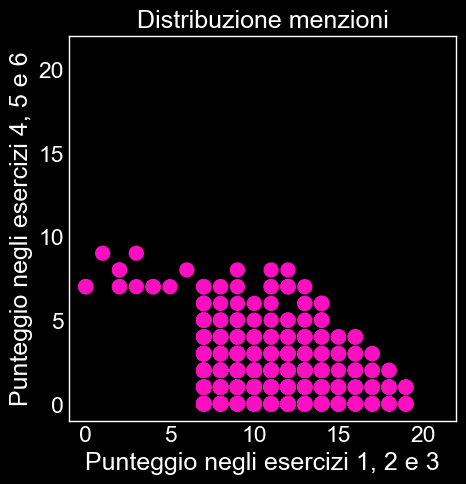

In [145]:
plt.style.use("dark_background")

fig, ax = plt.subplots( figsize = (5, 5) )
plt.scatter(CeseTot[CeseTot["medaglia"]=="MENZIONE"]["pt123"], CeseTot[CeseTot["medaglia"]=="MENZIONE"]["pt456"], alpha=1,
           s=100, c=CeseTot[CeseTot["medaglia"]=="MENZIONE"]["colore"])
ax.set_xlim(-1, 22)
ax.set_ylim(-1, 22)
ax.set_xlabel("Punteggio negli esercizi 1, 2 e 3")
ax.set_ylabel("Punteggio negli esercizi 4, 5 e 6")
ax.set_title("Distribuzione menzioni")
ax.grid(False);

In [146]:
CeseTot.to_pickle("data/datiBasePuliti/validi/Cese_Corretto_2003-2024.pickle")